In [232]:
# KNN Implementation from Scratch

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [233]:
# Definintions for all Distance Functions

def manhattan_distance(x, y):
    distance = 0.0
    dimensions = len(x)
    for i in range(dimensions):
        distance += abs(x[i] - y[i])
    return distance

def euclidian_distance(x, y):
    distance = 0.0
    dimensions = len(x)
    for i in range(dimensions):
        distance += (x[i] - y[i])**2
    distance = distance**(1/2)
    return distance

def cosine_distance(x, y):
    similarity = 0.0
    l2norm_x = 0.0
    l2norm_y = 0.0 
    dimensions = len(x)
    for i in range(dimensions):
        similarity += x[i] + y[i]
        l2norm_x += x[i]**2
        l2norm_y += y[i]**2
    l2norm_x = l2norm_x**(1/2)
    l2norm_y = l2norm_y**(1/2)
    similarity = similarity / (l2norm_x * l2norm_y)
    distance = 1 - similarity
    return distance

def hamming_distance(x, y):
    distance = 0.0
    dimensions = len(x)
    for i in range(dimensions):
        if x[i] != y[i]:
            distance += 1
    return distance

In [234]:
def take_second_element(row):
    return row[1]

def k_nearest_neighbors(k, featuresTrain, targetsTrain, featuresTest, distance_function):
    predictionTest = []
    # featuresTestIndex = []
    # for i in len(range(featuresTest)):
    #     featuresTestIndex.append(i)
    
    for testcase in featuresTest:
        distances = []
        i = 0
        for traincase in featuresTrain:
            distance = distance_function(testcase, traincase)
            distances.append((i,distance))
            i += 1
        distances.sort(key=take_second_element)
        k_neighbors = distances[:k]
        k_indices = []
        for row in k_neighbors:
            k_indices.append(row[0])
        
        count_0 = 0
        count_1 = 0

        for i in range(len(k_indices)):
            if targetsTrain.values[k_indices[i]] == 0:
                count_0 += 1
            else:
                count_1 += 1
        if count_0 > count_1:
            predictionTest.append(0)
        else:
            predictionTest.append(1)
    return predictionTest

In [235]:
# Import Training and Testing Data

dfTrain = pd.read_csv("../Data/TrainingData.csv")
dfTest = pd.read_csv("../Data/TestingData.csv")

# Define Features and Targets 

targetsTrain = dfTrain["home_team_result"]
featuresTrain = dfTrain.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1).values

targetsTest = dfTest["home_team_result"]
featuresTest = dfTest.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","home_team_result"],axis=1).values

k = 7
predictionTest = k_nearest_neighbors(k, featuresTrain, targetsTrain, featuresTest, hamming_distance)
print(predictionTest)
print(targetsTest.values)

correct = 0
total = 0
for i in range(len(targetsTest)):
    if predictionTest[i] == targetsTest[i]:
        correct += 1
    total += 1
accuracy = correct / total

print("Accuracy of model at K =", k ,"is", accuracy)

[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
[1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
Accuracy of model at K = 7 is 0.3125


Minimum error:- 0.25 at K = 4


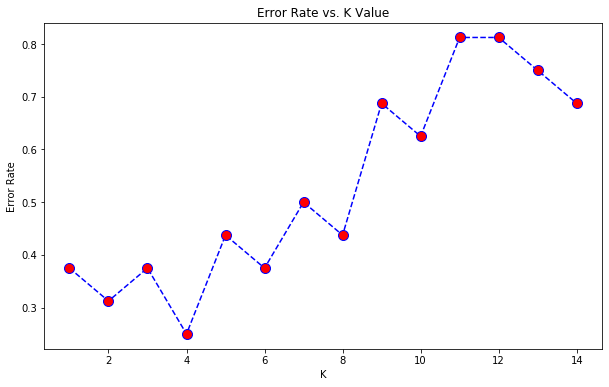

In [236]:
# Find Optimal Value of k
error_rate = []
for i in range(1,15):
 predictionTest_i = k_nearest_neighbors(i, featuresTrain, targetsTrain, featuresTest, manhattan_distance)
 error_rate.append(np.mean(predictionTest_i != targetsTest))

# Calculate Index with Minimum Error Rate
k_min = 100000
for i in range(0,14):
    if error_rate[i] <= k_min:
        k_min = error_rate[i]
        k_index = i + 1
        
# Generate Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", k_index)

k = k_index